In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url=r"...\housing.csv"
table=pd.read_csv(url)
table.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print(table.shape)
table.describe()
table.info()

(21613, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  

In [5]:
#We replace missing elements with the mean
table['bedrooms']=table['bedrooms'].fillna(table['bedrooms'].mean())
table['bathrooms']=table['bathrooms'].fillna(table['bathrooms'].mean())
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21613 non-null  float64
 5   bathrooms      21613 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

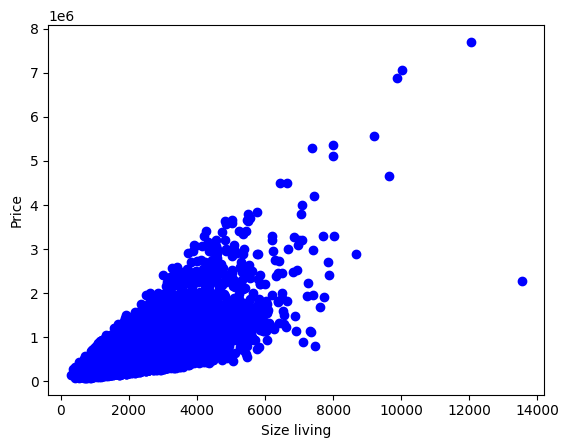

In [6]:
plt.scatter(table['sqft_living'],table['price'], color='b')
plt.xlabel('Size living')
plt.ylabel('Price')
plt.show()

In [7]:
#Linear regression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   #Metrics we will use.

X=table['sqft_living'].to_numpy()
Y=table['price'].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

regressor=linear_model.LinearRegression()
regressor.fit(x_train.reshape(-1,1),y_train) #the first argument should be a tensor of dimension 2!
print('Coefficient: ', regressor.coef_[0])
print('Intercept: ', regressor.intercept_)

y_pred=regressor.predict(x_test.reshape(-1,1))

print('Mean abs error: %.2f' % mean_absolute_error(y_pred,y_test))
print('Mean squared error: %.2f' % mean_squared_error(y_pred,y_test))
print('R2 score: %.2f' % r2_score(y_pred,y_test))

Coefficient:  283.9685571551295
Intercept:  -48257.063591027516
Mean abs error: 170780.93
Mean squared error: 61940787124.62
R2 score: 0.05


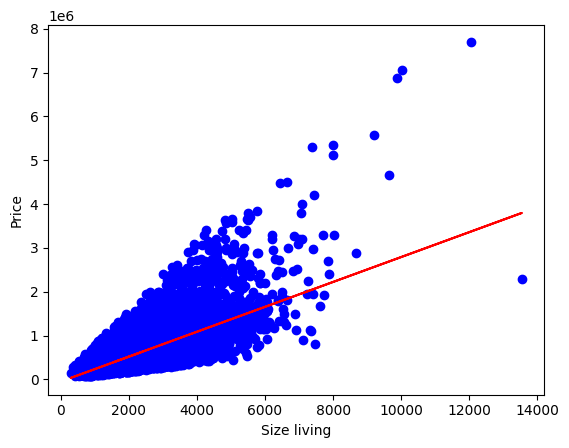

In [8]:
plt.scatter(table['sqft_living'],table['price'], color='b')
plt.plot(x_train, regressor.coef_[0]*x_train+regressor.intercept_, color='r')
plt.xlabel('Size living')
plt.ylabel('Price')
plt.show()

In [9]:
#Multilinear regression
table1=table[['price','sqft_living','sqft_lot','lat','long']]   #We focus on continuous (float) features.
table1.corr()   #To choose features for regression we consider the correlation matrix. We keep 'sqft_living' and 'lat' to predict price.

,price,sqft_living,sqft_lot,lat,long
price,1.000000,0.702035,0.089661,0.307003,0.021626
sqft_living,0.702035,1.000000,0.172826,0.052529,0.240223
sqft_lot,0.089661,0.172826,1.000000,-0.085683,0.229521
lat,0.307003,0.052529,-0.085683,1.000000,-0.135512
long,0.021626,0.240223,0.229521,-0.135512,1.000000


In [10]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

normalizer=preprocessing.StandardScaler()  #Normalizzo variabili 
X=normalizer.fit_transform(table[['sqft_living','lat']].to_numpy())
Y=table['price'].to_numpy()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

y_pred=regressor.predict(x_test)
print('Mean abs error: %.2f' % mean_absolute_error(y_pred,y_test))
print('Mean squared error: %.2f' % mean_squared_error(y_pred,y_test))
print('R2 score: %.2f' % r2_score(y_pred,y_test))

Coefficients:  [255686.93275541  99320.46475301]
Intercept:  542091.868086017
Mean abs error: 148331.60
Mean squared error: 52016872675.46
R2 score: 0.31


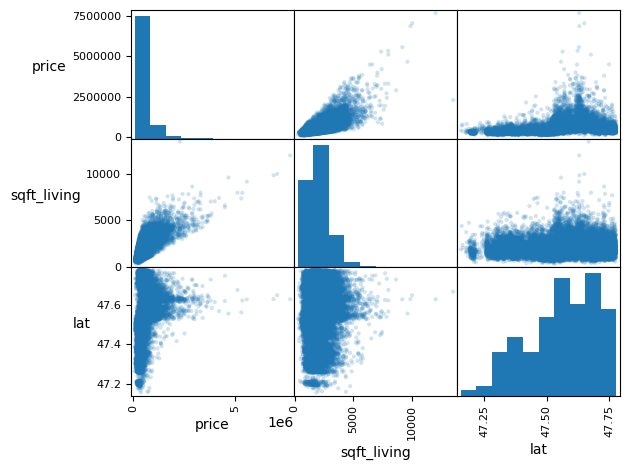

In [11]:
#Let us look at the Scatter matrix to identify potential non linear relations among features. 
axes = pd.plotting.scatter_matrix(table[['price','sqft_living','lat']], alpha=0.2)
# We can rotate axis labels to better read them. Not necessary in this case.
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(0)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [12]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix
#Modify table for purpose: we split data into cheap (<600000$) and expensive (>600000$)
price=table['price'].to_list()
price_l=list(map(lambda x: 1 if x>600000 else 0,price))
table1=table.drop(['Unnamed: 0','id','date','price'],axis=1)

normalizer=preprocessing.StandardScaler()    #Normalize features
X=normalizer.fit_transform(table1.to_numpy())
Y=np.array(price_l)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0) 

LR=LogisticRegression().fit(x_train,y_train)
y_pred=LR.predict(x_test) 
y_predprob=LR.predict_proba(x_test) #LR.predict_proba(x_test) to read off probabilities.

print('Log Loss Value: ', log_loss(y_test,y_predprob)) 
confusion_matrix(y_test,y_pred)

Log Loss Value:  0.2697411107179897


array([[2920,  195],
       [ 314,  894]], dtype=int64)

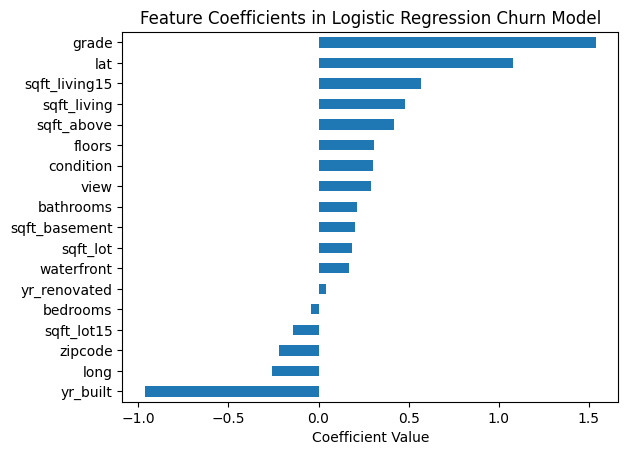

In [13]:
#We plot coefficients to see how changing each feature affects the probability values.
coefficients = pd.Series(LR.coef_[0], index=table1.columns)
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

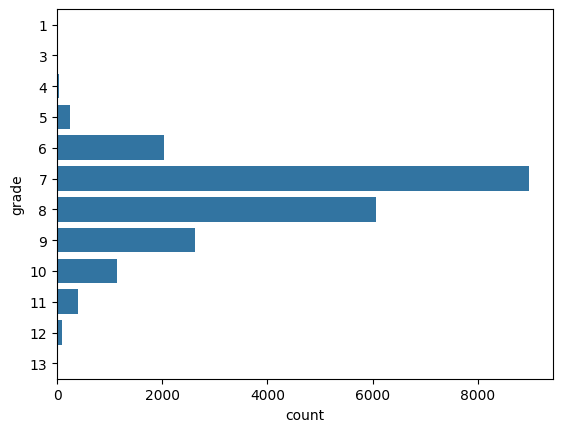

Accuracy OVA: 50.89%
Accuracy OVO: 56.86%


In [14]:
#Algorithms for Multiclass Classification
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

#First of all check if the various classes are balanced
sns.countplot(y='grade',data=table)
plt.show()
#We normalize continuous features.
continuous=table.select_dtypes(include=['float64']).columns.to_list()
normalizer=StandardScaler()
scaled=normalizer.fit_transform(table[continuous])
scaled_df=pd.DataFrame(scaled, columns=normalizer.get_feature_names_out(continuous))
new_df=pd.concat([table.drop(columns=continuous),scaled_df], axis=1)

#If we have categorical features we can convert them to numeric with oneHotEncoder. We do not need this here, however the code is:
'''
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
prepped_data = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
'''
#Encode target variable
new_df['grade']=new_df['grade'].astype('category').cat.codes

X=new_df[['lat','sqft_living','floors','condition','bedrooms','bathrooms']]
Y=new_df['grade']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #We add stratify=Y to maintain proportions during splitting.

#One-vs-All
model_ova=OneVsRestClassifier(LogisticRegression(max_iter=1000))
model_ova.fit(x_train,y_train)
y_pred=model_ova.predict(x_test)
print(f"Accuracy OVA: {np.round(100*accuracy_score(y_test, y_pred),2)}%")

#One-vs-One
model_ovo=OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(x_train,y_train)
y_pred2=model_ovo.predict(x_test)
print(f"Accuracy OVO: {np.round(100*accuracy_score(y_test, y_pred2),2)}%")

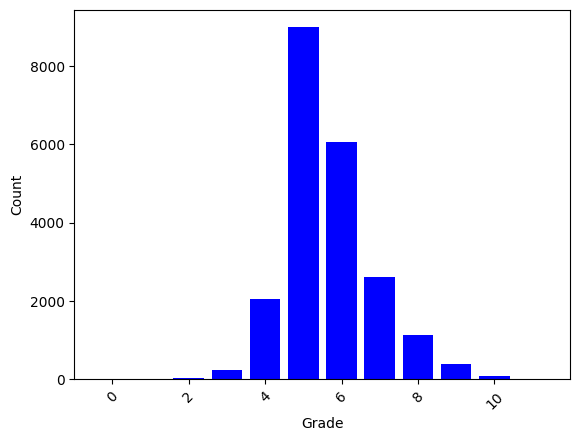

Accuracy:  0.5287994448299792


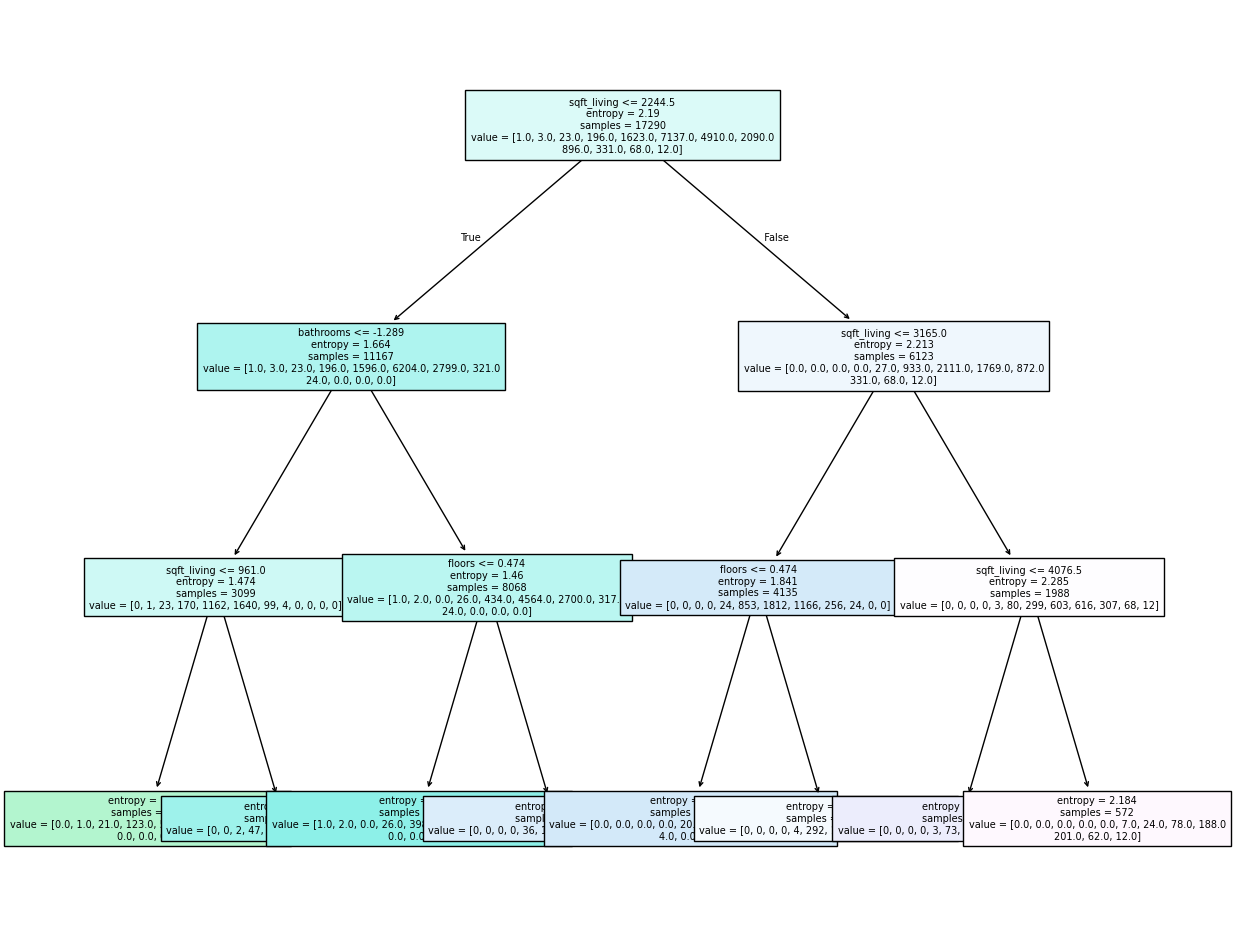

In [15]:
#DecisionTrees
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder 

#If we have categorical features we should convert them to numeric. We do not need this here, however the code is:
'''
label_encoder = LabelEncoder()
my_data['cat'] = label_encoder.fit_transform(my_data['cat'])
Or
custom_map = {'cat1':0,'cat2':1,'cat3':2,'cat4':3}
my_data['col'] = my_data['col'].map(custom_map)
'''
#Category Analysis
counting=new_df['grade'].value_counts()
plt.bar(counting.index, counting.values, color='blue')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.show()

#let us use the data defined above
X=new_df[['lat','sqft_living','floors','condition','bedrooms','bathrooms']]
Y=new_df['grade']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

house_tree=DecisionTreeClassifier(criterion='entropy', max_depth=3)
house_tree.fit(x_train,y_train)
y_hat=house_tree.predict(x_test)
print('Accuracy: ', metrics.accuracy_score(y_test,y_hat))
#Visualize tree
feat=['lat','sqft_living','floors','condition','bedrooms','bathrooms']
plt.figure(figsize=(14,12))
plot_tree(house_tree,feature_names = feat, filled = True, fontsize=7)
plt.show()

In [16]:
#Regression Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize

#Normalize data
X=table[['grade','sqft_living','floors','condition','bedrooms','bathrooms']].values
X=normalize(X, axis=1, norm='l1', copy=False) #Other way to normalize...
Y=table['price'].values
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

model=DecisionTreeRegressor(criterion='squared_error', max_depth=6, random_state=0)
model.fit(x_train,y_train)
price_pred= model.predict(x_test)

mse= mean_squared_error(y_test, price_pred)
r2_score=model.score(x_test,y_test)
print('Mean squared error: ', mse)
print('R2 score: ', r2_score)

Mean squared error:  66886477188.58112
R2 score:  0.4375708374399404


In [17]:
# Support Vector Machine
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.utils.class_weight import compute_sample_weight

cost=list(map(lambda x: 1 if x>600000 else 0, table['price']))
table.grade.unique()  #List of unique values
table.grade.value_counts()  #Number of elements for each value
t_new=table.drop(['price'], axis=1)
# We normalize to 0 mean and unit variance
X= StandardScaler().fit_transform(t_new.iloc[:,3:])
Y=np.array(cost)
X=normalize(X, norm='l1') #Further normalize with L1 norm for faster convergence

x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)
w_train=compute_sample_weight('balanced', y_train) #Sample weight to take into account sample imbalance during training (e.g. for decision tree)

svm=LinearSVC(class_weight='balanced', loss='hinge', random_state=0, fit_intercept=False)
svm.fit(x_train,y_train)
y_pred=svm.decision_function(x_test) #Probability to be in class 1
score=roc_auc_score(y_test,y_pred) #Score measuring the ability of the model to distinguish the two classes.
print('Roc-Auc Score: %.3f' %score)

Roc-Auc Score: 0.941


Best value of k is 23
Accuracy: 0.674


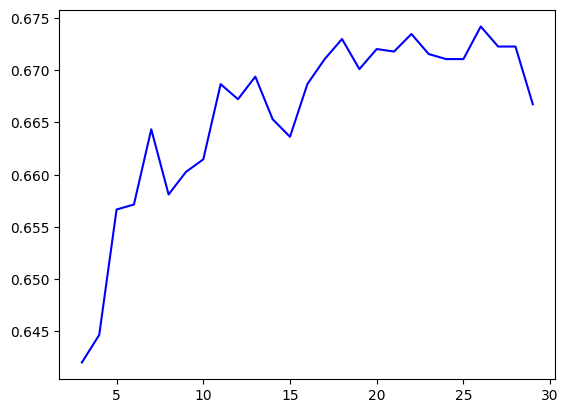

In [18]:
#Supervised learning with KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

table['grade'].value_counts() #We only consider 'grades' between 6 and 10 which are the most frequent
table_1=table[(table['grade']>5)&(table['grade']<11)]
table_1=table_1.iloc[:,3:]
correlated_cols= abs(table_1.corr()['grade'].drop('grade')).sort_values(ascending=False)[:7] #There are 7 columns with correlation >0.25. We keep those
tf=table_1[list(correlated_cols.index)]

X=tf
X_norm= StandardScaler().fit_transform(X)   #It is important to rescale to use KNN
Y=table_1['grade']
x_train,x_test,y_train,y_test=train_test_split(X_norm,Y, test_size=0.2, random_state=0)

array=[]
for i in range(3,30):
    classifier=KNeighborsClassifier(n_neighbors=i)
    model=classifier.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    array.append(accuracy_score(y_test,y_pred))
print(f'Best value of k is {np.argmax(array)}')
print('Accuracy: %.3f' %max(array))

plt.plot(range(3,30),array, color='b')
plt.show()

In [19]:
#Bagging and Boosting
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import time

data=pd.concat([tf,table_1['grade']],axis=1)
X=data.drop('price',axis=1).values
Y=tf['price'].values
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

n_estimators=100
rf = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
xgb = XGBRegressor(n_estimators=n_estimators, random_state=42)


st=time.time()
rf.fit(x_train,y_train)
ft=time.time()
train_time=ft-st

st2=time.time()
xgb.fit(x_train,y_train)
ft2=time.time()
train_time2=ft2-st2

st_pred=time.time()
y_predrf=rf.predict(x_test)
ft_pred=time.time()
test_time=ft_pred-st_pred

st2_pred=time.time()
y_predxgb=xgb.predict(x_test)
ft2_pred=time.time()
test_time2=ft2_pred-st2_pred


mse_rf=mean_squared_error(y_test,y_predrf)
mse_xgb=mean_squared_error(y_test,y_predxgb)
r2_rf=r2_score(y_test,y_predrf)
r2_xgb=r2_score(y_test,y_predxgb)
print(f'MSE random forest: {mse_rf:.3f}, MSE XGBoost: {mse_xgb:.3f}')
print(f'R2 score random forest: {r2_rf:.3f}, R2 score XGBoost: {r2_xgb:.3f}')
print(f'MSE training time: {train_time:.3f} seconds, XGBoost training time: {train_time2:.3f} seconds')
print(f'R2 score random forest: {test_time:.3f} seconds, R2 score XGBoost: {test_time2:.3f} seconds')
print(np.std(y_test))

MSE random forest: 31148766966.559, MSE XGBoost: 32034951821.958
R2 score random forest: 0.648, R2 score XGBoost: 0.638
MSE training time: 15.018 seconds, XGBoost training time: 0.318 seconds
R2 score random forest: 0.224 seconds, R2 score XGBoost: 0.006 seconds
297499.2424587658


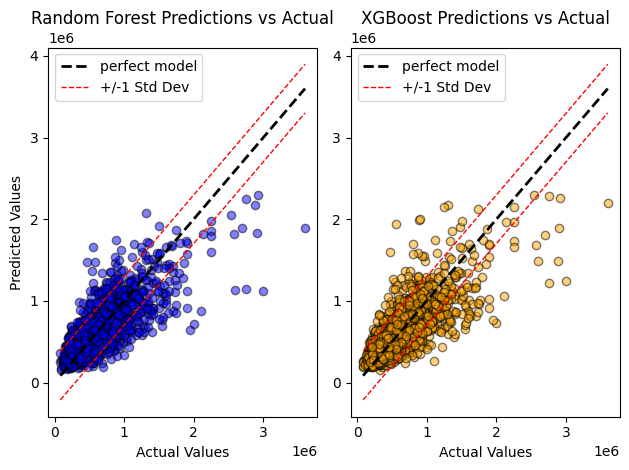

In [20]:
std_y=np.std(y_test)

# Random Forest plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_predrf, alpha=0.5, color="blue",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
#plt.ylim(0,6)
plt.title("Random Forest Predictions vs Actual")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()


# XGBoost plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_predxgb, alpha=0.5, color="orange",ec='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,label="perfect model")
plt.plot([y_test.min(), y_test.max()], [y_test.min() + std_y, y_test.max() + std_y], 'r--', lw=1, label="+/-1 Std Dev")
plt.plot([y_test.min(), y_test.max()], [y_test.min() - std_y, y_test.max() - std_y], 'r--', lw=1, )
#plt.ylim(0,6)
plt.title("XGBoost Predictions vs Actual")
plt.xlabel("Actual Values")
plt.legend()
plt.tight_layout()
plt.show()

[3 0 3 ... 3 3 3]
[[ 0.27579124 -0.4226115 ]
 [ 1.45914676  0.86130882]
 [ 1.9700681   3.57565696]
 [-0.90032804 -0.62902838]
 [-0.07030914  0.48433575]]


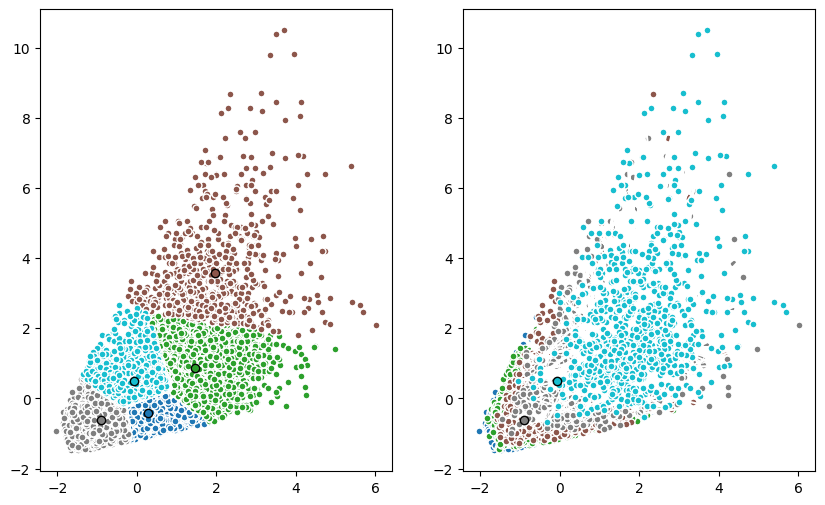

In [21]:
#Unsupervised clustering with K-means
from sklearn.cluster import KMeans 
import plotly.express as px

table.iloc[:,3:].corr()['grade'].sort_values() #sqft_above and sqft_living are the features with the highest correlation. 
t_new=table.iloc[:,3:][(table['grade']>5)&(table['grade']<11)]
t_final=t_new[['sqft_living','price']]
X=StandardScaler().fit_transform(t_final.values)
Y=t_new['grade'].values

k_means=KMeans(init='k-means++', n_clusters=5, n_init=15)
k_means.fit(X)
pred_labels=k_means.labels_   #Cluster assignment of the various data points.
cluster_centers=k_means.cluster_centers_  #Position of the centers of the 5 clusters.
print(pred_labels)
print(cluster_centers)

fig = plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(pred_labels))))
ax = fig.add_subplot(1, 2, 1)
for k, col in zip(range(len(cluster_centers)), colors):
    my_members = (pred_labels == k)
    cluster_center = cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax1 = fig.add_subplot(1, 2, 2)
for k, col in zip(range(len(cluster_centers)), colors):
    my_members2 = (Y-6 == k)
    cluster_center = cluster_centers[k]
    ax1.plot(X[my_members2, 0], X[my_members2, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax1.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

plt.show()

In [22]:
#DBSCAN e HDBSCAN
from sklearn.cluster import DBSCAN
import hdbscan

table.iloc[:,3:].corr()['grade'].sort_values() #sqft_above e sqft_living are the most correlated
t_new=table.iloc[:,3:][(table['grade']>5)&(table['grade']<11)]
t_final=t_new[['sqft_living','price']]
X=StandardScaler().fit_transform(t_final)

min_samples=3
eps=0.1
metric='euclidean'

dbscan=DBSCAN(min_samples=min_samples, eps=eps, metric=metric).fit(X)
df=pd.DataFrame(X)
df['Clusters']=dbscan.fit_predict(X)
df['Clusters'].value_counts() #Most points end up in the same cluster

min_samples=None
min_cluster_size=3
hdb = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, metric='euclidean')
hdb.fit(X)
df['Clusters1']=dbscan.fit_predict(X)
df['Clusters1'].value_counts() #Similar outcome by setting min_cluster_size.

C:\Users\sgiac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\sgiac\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Clusters1
 0     20171
-1       328
 4        27
 20       26
 24       19
       ...  
 60        3
 18        3
 53        3
 19        3
 54        3
Name: count, Length: 63, dtype: int64

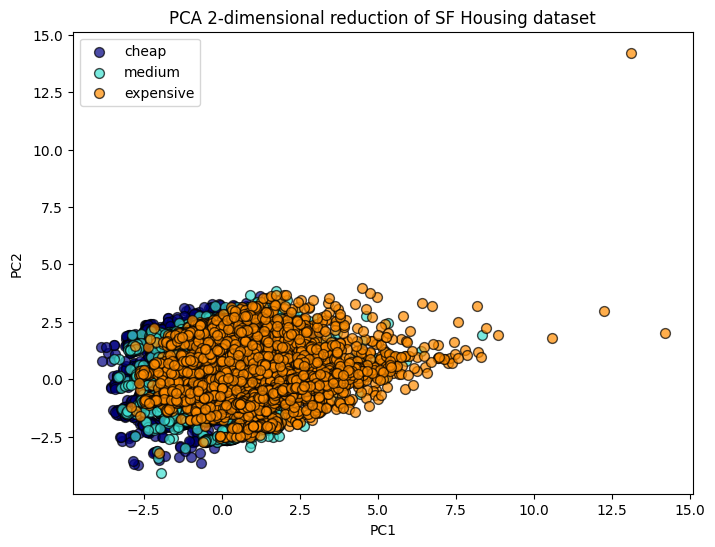

array([0.41931988, 0.19208268])

In [23]:
#PCA
from sklearn.decomposition import PCA

tt=table[['lat','sqft_living','floors','condition','bedrooms','bathrooms']]
X=StandardScaler().fit_transform(tt)
Y_p=table['price'].values
Y_pp=list(map(lambda x: 2 if x>600000 else x,Y_p))
Y_ppp=list(map(lambda x: 1 if x>400000 else x,Y_pp))
Y=np.array(list(map(lambda x: 0 if x>2 else x,Y_ppp)))

pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

plt.figure(figsize=(8,6))
target=['cheap','medium','expensive']
colors = ['navy', 'turquoise', 'darkorange']
lw = 1
for color, i, target_name in zip(colors, [0, 1, 2], target):
    plt.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], color=color, s=50, ec='k',alpha=0.7, lw=lw,
                label=target_name)

plt.title('PCA 2-dimensional reduction of SF Housing dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
# plt.grid(True)
plt.show()

pca.explained_variance_ratio_

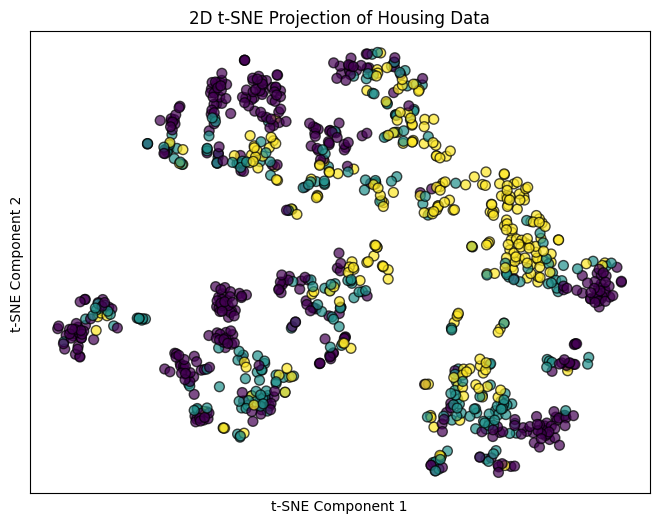

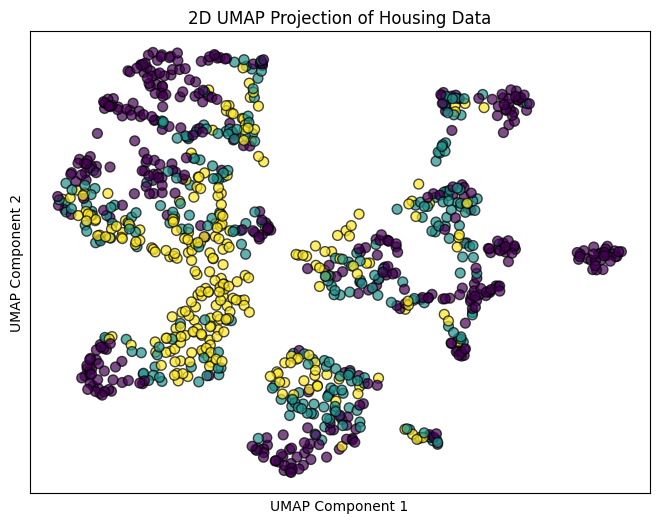

In [24]:
#t-SNE and UMAP
import umap.umap_ as UMAP 
from sklearn.manifold import TSNE

tt=table[['lat','sqft_living','floors','condition','bedrooms','bathrooms']].iloc[:1000,:]
X=StandardScaler().fit_transform(tt)
Y_p=table['price'].iloc[:1000].values
Y_pp=list(map(lambda x: 2 if x>600000 else x,Y_p))
Y_ppp=list(map(lambda x: 1 if x>400000 else x,Y_pp))
Y=np.array(list(map(lambda x: 0 if x>2 else x,Y_ppp)))

tsne=TSNE(n_components=2, random_state=0, perplexity=30, max_iter=1000)   #tSNE
X_tsne=tsne.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')
ax.set_title("2D t-SNE Projection of Housing Data")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_xticks([])
ax.set_yticks([])
plt.show()


umap=UMAP.UMAP(n_components=2, random_state=0, min_dist=0.5, spread=1,n_jobs=1)   #UMAP
X_umap=umap.fit_transform(X)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(X_umap[:, 0], X_umap[:, 1], c=Y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

ax.set_title("2D UMAP Projection of Housing Data")
ax.set_xlabel("UMAP Component 1", )
ax.set_ylabel("UMAP Component 2", )
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [4]:
#Some further analysis with Lasso and Linear regression
table1=table.select_dtypes(include=['int','float'])
table1.dropna(inplace=True)
table1.shape

(21597, 21)

In [17]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [6]:
Y=table1['price'].to_numpy()
X=table1[['lat','sqft_living','floors','condition','bedrooms','bathrooms']].to_numpy()

X=StandardScaler().fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

model=Lasso(alpha=.1)
model.fit(x_train,y_train)
y_hat=model.predict(x_test)

print(f'R2 score: {r2_score(y_test,y_hat)}')
print(f'mse: {mean_squared_error(y_test,y_hat)}')
print(f'mae: {mean_absolute_error(y_test,y_hat)}')

R2 score: 0.5907139183316182
mse: 52945015479.20698
mae: 146041.10312836734


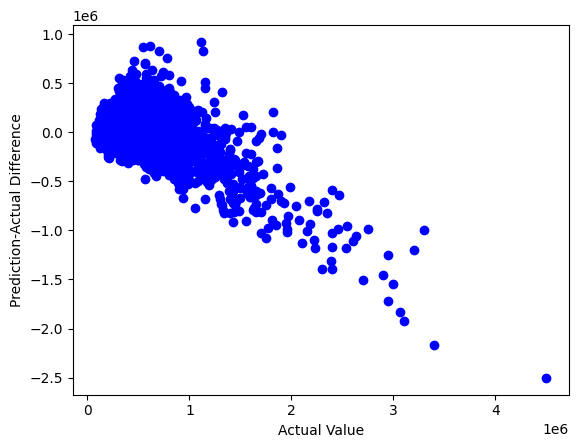

In [16]:
plt.scatter(y_test,y_hat-y_test,color='b')
plt.xlabel('Actual Value')
plt.ylabel('Prediction-Actual Difference')
plt.show()

In [17]:
a=np.select([y_hat<y_test,y_hat>y_test],[y_hat-y_test,y_test])
np.max(a)

1920000.0

In [19]:
model=LinearRegression()
model.fit(y_test.reshape(-1,1),y_hat-y_test)
x=model.intercept_+model.coef_[0]*y_test
y_p=y_hat-x

print(f'R2 score: {r2_score(y_test,y_p)}')
print(f'mse: {mean_squared_error(y_test,y_p)}')
print(f'mae: {mean_absolute_error(y_test,y_p)}')

R2 score: 0.7244286490628364
mse: 32189212493.901905
mae: 135315.03029607108


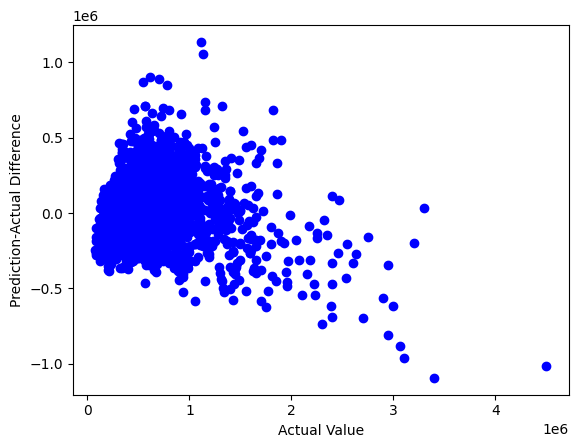

In [22]:
plt.scatter(y_test,y_p-y_test,color='b')
plt.xlabel('Actual Value')
plt.ylabel('Prediction-Actual Difference')
plt.show()

In [7]:
print(model.coef_)

[ 97548.04877543 274160.84843083   4167.4922841   34584.81271662
 -52188.46257925  11078.89969545]


In [9]:
# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

#Modify table for purpose
price=table['price'].to_list()
price_l=list(map(lambda x: 1 if x>600000 else 0,price))
table1=table.drop(['Unnamed: 0','id','date','price'],axis=1)

Y=pd.DataFrame(price_l).iloc[:1000]
X=table1.iloc[:1000,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

#We use different preprocessing pipelines for numeric and categorical variables.
numerical_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#We concatenate the two into a single 'preprocessor'
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#Model Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=2)
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.3s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__max_depth': [None, 10, ...], 'classifier__min_samples_split': [2, 5], 'classifier__n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [10]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       145
           1       0.90      0.78      0.83        55

    accuracy                           0.92       200
   macro avg       0.91      0.87      0.89       200
weighted avg       0.91      0.92      0.91       200



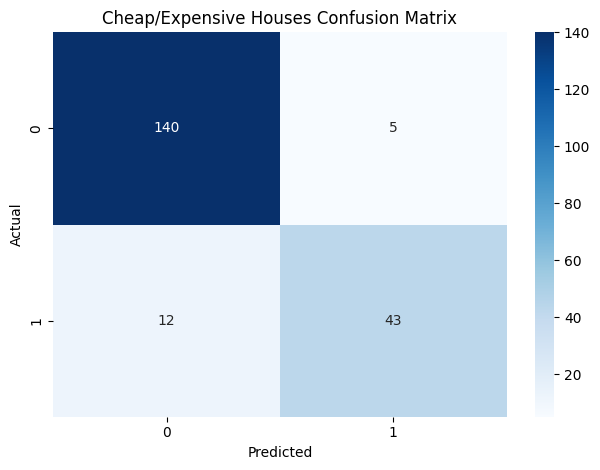

In [11]:
#Plot confusion matrix for Random Forest
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Cheap/Expensive Houses Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

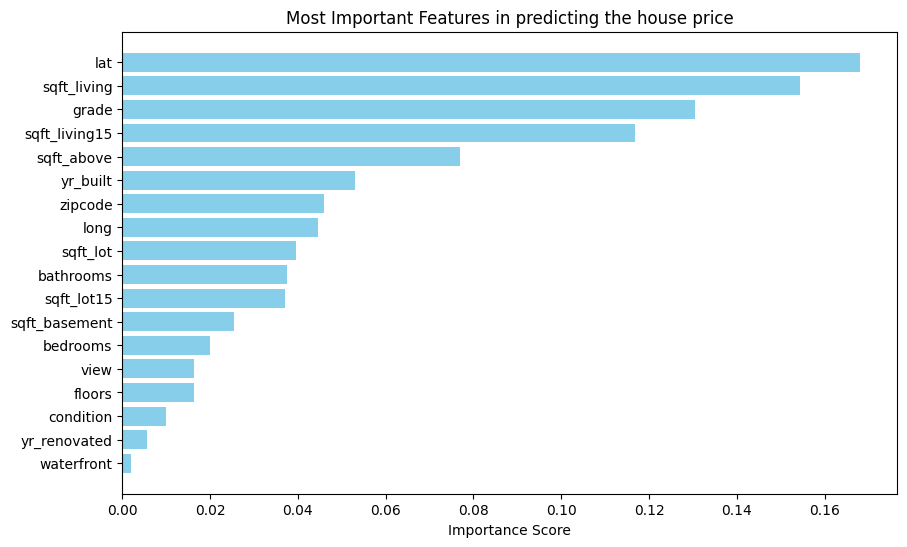


Test set accuracy: 91.50%


In [12]:
#If needed we can retrieve the labels of categorical variables with the following code.
#model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

feature_importances = model.best_estimator_['classifier'].feature_importances_
# Combine the numerical and one-hot encoded categorical feature names
feature_names = numerical_features #+ list(model.best_estimator_['preprocessor']
                                   #     .named_transformers_['cat']
                                   #     .named_steps['onehot']
                                   #     .get_feature_names_out(categorical_features))

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting the house price')
plt.xlabel('Importance Score')
plt.show()

# Print test score 
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

In [13]:
#Same analysis with XGBoost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1, 0.2, 0.5],
           'n_estimators': [50, 100, 200]}

xgbc = xgb.XGBClassifier(seed = 42)
clf = GridSearchCV(estimator=xgbc, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=2)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'max_depth': [3, 6, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [14]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       145
           1       0.89      0.76      0.82        55

    accuracy                           0.91       200
   macro avg       0.90      0.86      0.88       200
weighted avg       0.91      0.91      0.91       200



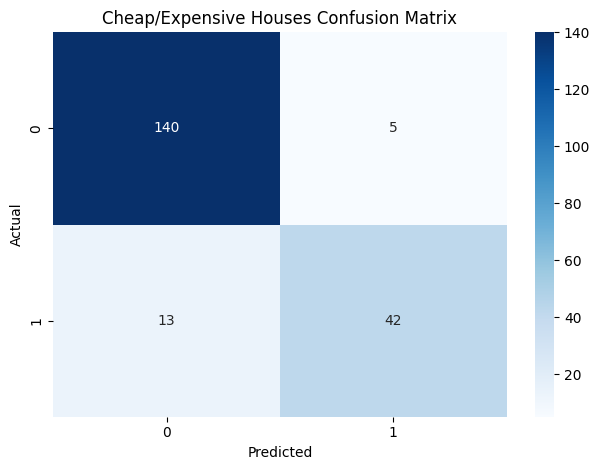

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Cheap/Expensive Houses Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

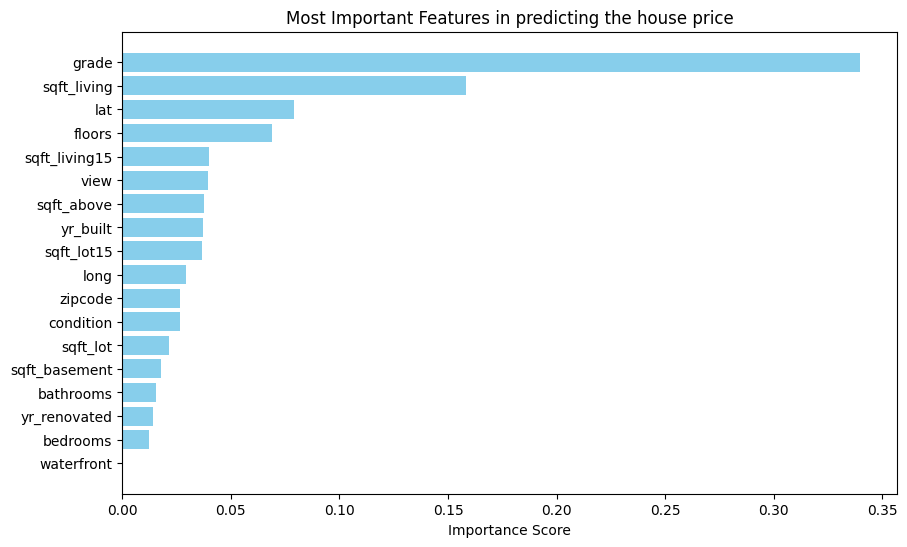


Test set accuracy: 91.00%


In [16]:
feature_importances = clf.best_estimator_.feature_importances_
feature_names = X_train.columns.to_list()

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting the house price')
plt.xlabel('Importance Score')
plt.show()

# Print test score 
test_score = clf.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")

In [29]:
#XGBoost for Regressione

Y=pd.DataFrame(price).iloc[:1000]
X=table1.iloc[:1000,:]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1, 0.2, 0.5],
           'n_estimators': [50, 100, 200]}

xgbr = xgb.XGBRegressor(seed = 42)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=2)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_e

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.1, 0.2, ...], 'max_depth': [3, 6, ...], 'n_estimators': [50, 100, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,None
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

pred_new=clf.predict(X_test)

print(f'Mean Squared Error %.3f:' % mean_squared_error(y_test,pred_new))
print(f'Mean Absolute Error %.3f:' % mean_absolute_error(y_test,pred_new))

Mean Squared Error 28674623488.000:
Mean Absolute Error 78058.180:


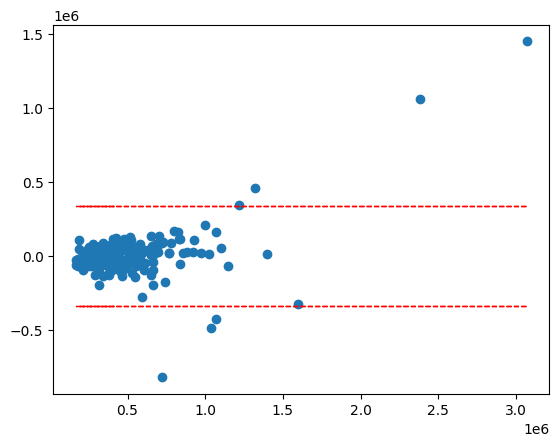

In [42]:
#Plot of the difference between predicted and actual value as a function of actual value. We also indicate the std of actual values.
std_y=np.std(y_test.squeeze())
std=std_y*np.ones(y_test.shape[0])

plt.scatter(y_test.squeeze(),y_test.squeeze()-pred_new)
plt.plot(y_test.squeeze(), std, 'r--', lw=1)
plt.plot(y_test.squeeze(), -std, 'r--', lw=1)

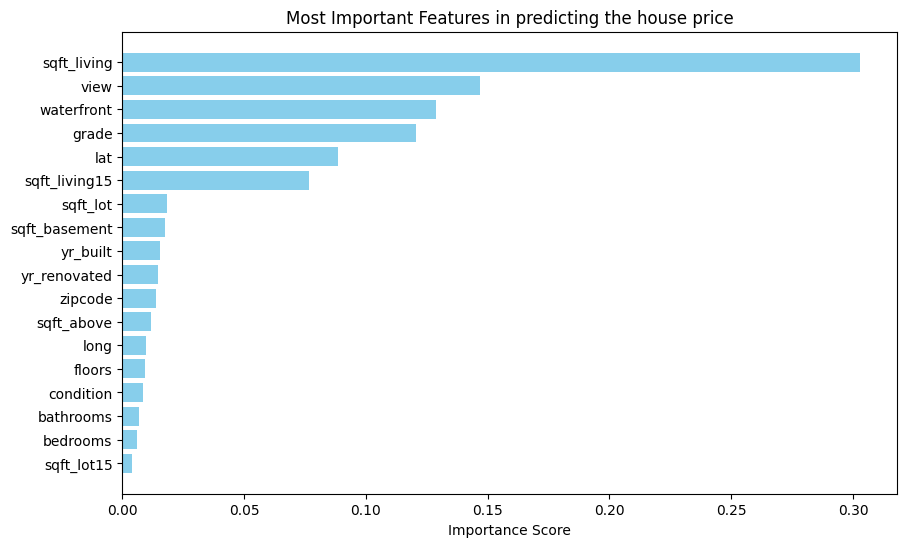

In [32]:
feature_importances = clf.best_estimator_.feature_importances_
feature_names = X_train.columns.to_list()

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title('Most Important Features in predicting the house price')
plt.xlabel('Importance Score')
plt.show()